In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
from collections import Counter

In [8]:
os.chdir("c:\\Users\\Daniel\\Desktop\\Grad school\\UWaterloo Masters\\Winter 2024\\STAT923\\Final Project\\STAT932_Final_Project\\Images")

In [9]:
data = pd.read_csv('data.csv')
print(data.head())

                        images  labels
0  20130529_01_Driv_001_f .jpg       0
1  20130529_01_Driv_002_f .jpg       0
2  20130529_01_Driv_003_f .jpg       0
3  20130529_01_Driv_004_f .jpg       0
4  20130529_01_Driv_005_f .jpg       0


We can analyze the distribution of the labels

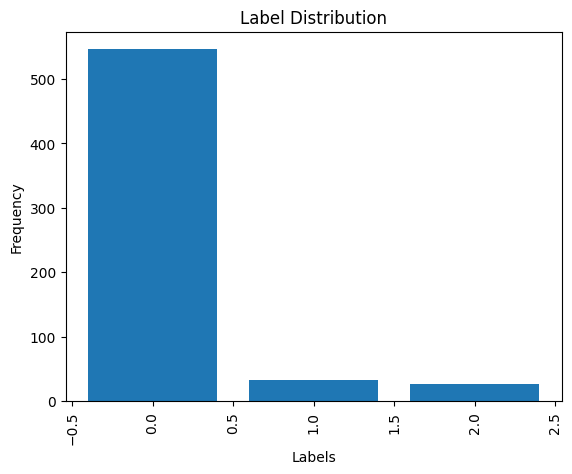

In [13]:
label_counts = Counter(data['labels'])
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.xticks(rotation='vertical')
plt.show()

We see there is a heavy class imbalance with a heavy bias towards class label 0, which is the forward facing images

Next, we can display some sample images

In [14]:
os.chdir("c:\\Users\\Daniel\\Desktop\\Grad school\\UWaterloo Masters\\Winter 2024\\STAT923\\Final Project\\STAT932_Final_Project\\Images\\DrivImages")

In [22]:
def display_sample_images(image_paths, labels, samples=5):
    fig, axs = plt.subplots(1, samples, figsize=(15, 5))
    for i in range(samples):
        random_idx = random.randint(0,len(image_paths) -1)
        img = Image.open(image_paths[random_idx])
        axs[i].imshow(img)
        axs[i].set_title(labels[random_idx])
        axs[i].axis('off')
    plt.show()

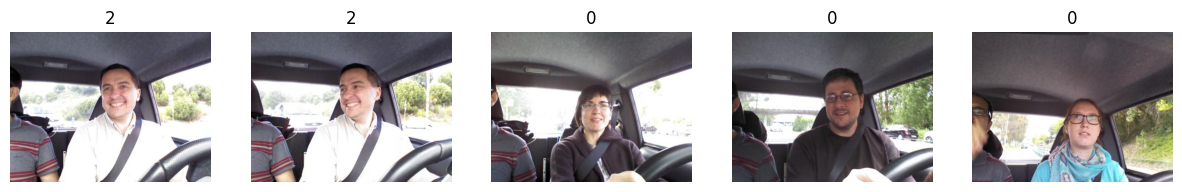

In [23]:
display_sample_images(data['images'], data['labels'])

We can also analyze Image Dimensions and Color Channels

In [24]:
def analyze_image_dimensions(image_paths):
    widths, heights = [], []
    for path in image_paths:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    return widths, heights

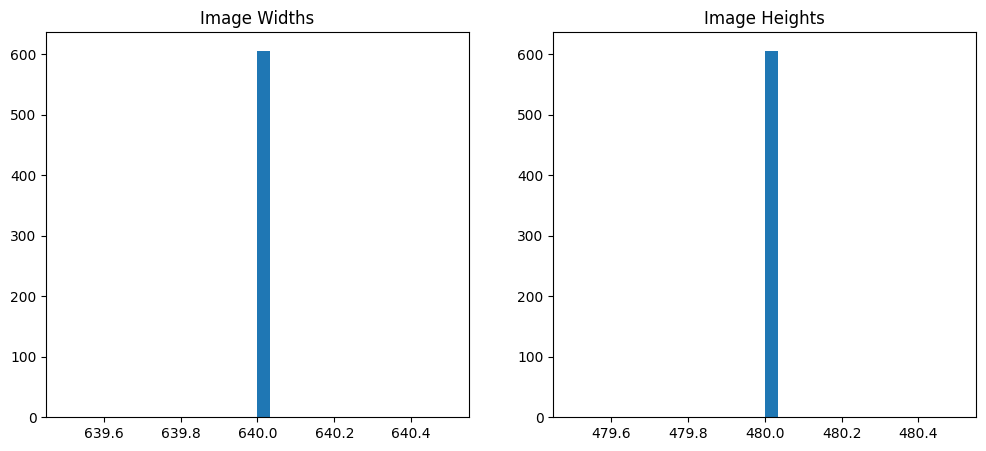

In [25]:
widths, heights = analyze_image_dimensions(data['images'])
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30)
plt.title('Image Widths')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30)
plt.title('Image Heights')

plt.show()

We see all images are 640 x 480 pixels, so there is no need to standardize image dimensions

We can also analyze Color Intensity Distribution 

In [33]:
def plot_color_histogram(image_path, idx):
    with Image.open(image_path) as img:
        plt.figure(figsize=(10, 4))
        for i, color in enumerate(['r', 'g', 'b']):
            color_data = np.array(img)[:, :, i].flatten()
            plt.hist(color_data, color=color, alpha=0.5, bins=30, label=f'{color.upper()} channel')
        plt.legend()
        plt.title(f'Color Intensity Distribution for Image {idx}')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        plt.show()

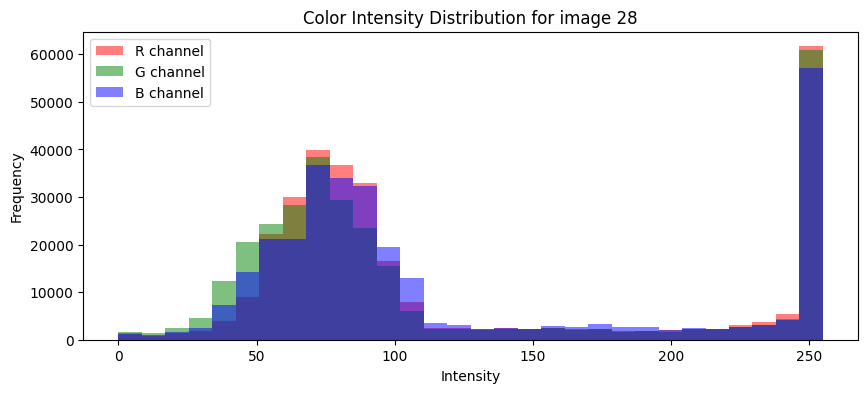

In [45]:
random_idx2 = random.randint(0,len(data['images']) -1)
plot_color_histogram(data['images'][random_idx2], random_idx2)


We can modify our previous function to also visualize the image at this idx

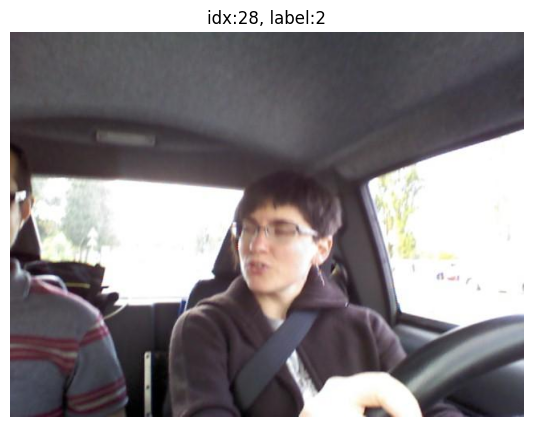

In [46]:
def display_single_images(image_paths, labels, idx):
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    img = Image.open(image_paths[idx])
    axs.imshow(img)
    axs.set_title('idx:' + str(idx) + ", label:"+ str(labels[idx]))
    axs.axis('off')
    plt.show()

display_single_images(data['images'],data['labels'], random_idx2)

We see that the colours are mainly RGB, implying 3 channels, which is evident in the images themselves. 
However we could binarize the colours, i.e. make them black and white, for computational efficiency, but it may affect predictive accuracy.
